# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_stats_salary_18-19')
rbs.head()

,NAME,ATT,YDS/ATT,ATT/G,100+ YDS,TD,LONG,FUM,FUML,ATT_rank,YDS/ATT_rank,ATT/G_rank,100+ YDS_rank,TD_rank,LONG_rank,FUM_rank,FUML_rank,salary
0,Mark Ingram,138,4.7,11.5,2,6,38,3,1,32.0,34.0,28.0,20.5,21.0,34.5,87.5,64.0,4000000
1,Zach Zenner,55,4.8,6.9,0,3,29,0,0,66.5,29.0,56.0,70.0,44.0,51.5,16.0,23.5,1050000
2,Kapri Bibbs,21,4.9,1.8,0,3,15,1,0,92.5,23.5,96.0,70.0,44.0,86.0,49.5,23.5,987500
3,Sony Michel,209,4.5,16.1,4,6,34,1,1,14.0,47.0,10.5,8.5,21.0,42.5,49.5,64.0,2406674
4,Ronald Jones II,23,1.9,2.6,0,1,9,0,0,91.0,96.0,88.0,70.0,72.0,94.5,16.0,23.5,1767977


In [3]:
rbs.columns

Index(['NAME', 'ATT', 'YDS/ATT', 'ATT/G', '100+ YDS', 'TD', 'LONG', 'FUM',
       'FUML', 'ATT_rank', 'YDS/ATT_rank', 'ATT/G_rank', '100+ YDS_rank',
       'TD_rank', 'LONG_rank', 'FUM_rank', 'FUML_rank', 'salary'],
      dtype='object')

In [4]:
model = LinearRegression()

In [5]:
X = rbs[['ATT', 'YDS/ATT', 'ATT/G', '100+ YDS', 'TD',
         'FUM', 'FUML', 'LONG', ]]
y = rbs['salary']

In [6]:
X.shape

(44, 8)

In [7]:
y.shape

(44,)

In [8]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred = model.predict(X)

In [10]:
def MSE(y_true, y_pred):
    squared_error = 0
    for i in range(len(y_true)):
        squared_error += (y_true[i] - y_pred[i]) ** 2
    return squared_error / len(y_true)

In [11]:
np.sqrt(MSE(y, y_pred))

2464193.0658241874

In [12]:
model.intercept_

5290121.29201608

In [13]:
model.coef_

array([   4850.46390064, -751436.17030718,  163325.8209545 ,
        396959.69931787,   89032.65602734, -303879.60645178,
        160623.38592269,  -36584.68845396])

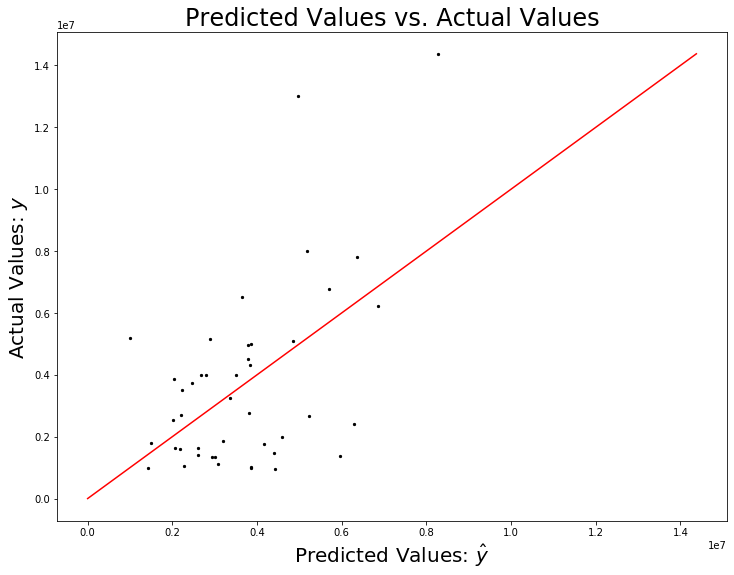

In [14]:
plt.figure(figsize=(12,9))

plt.scatter(y_pred, y, s=5, color='black')

plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'red')

plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

In [15]:
r2_score(y, y_pred)

0.28405857629492526